In [262]:
import pandas as pd
import numpy as np
import math
import time
from scipy.optimize import minimize
import astropy.constants as const
import rebound

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':20})
rc('text', usetex=True)
rc('figure', facecolor='w')
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

G = 6.674e-8

In [227]:
# Stellar parameters
mstar = .32 
         
# Planet parameters
N = 4
P = np.array([61.1166, 30.0881, 1.937780, 124.26])
a = np.array([0.208317, 0.129590, 0.02080665, 0.3343])
e = np.array([0.0324, 0.25591, 0.207, 0.055])
m = np.array([2.2756, 0.7142, 0.021, 0.046]) * const.M_jup.value / const.M_sun.value
w = np.array([234, 48.76, 50.3, 239]) * math.pi/180
M = np.array([355, 294.59, 325.7, 335]) * math.pi/180
K = np.array([6.56, 88.34, 214.00, 3.42])
i = 59
names = ['*', 'b', 'c', 'd', 'e']
colors = ['k', 'b', 'g', 'r', 'm']

def inclination_mass(i, mp):
    return mp * np.sin(i)/np.sin(inc)

In [268]:
t0 = time.time()
sim = rebound.Simulation()
sim.units = ('days','AU','Msun')
sim.integrator = "whfast"
sim.dt = 1e-3

sim.add(m=mstar)
for k in range(N):
    inc_d = 10
    inc = inc_d * math.pi/180
    sim.add(m=inclination_mass(inc, m[k]), e=e[k], a=a[k], omega=w[k], M=M[k], inc=inc) 
sim.move_to_com()

torb = P[3]
Noutputs = 1000
times = np.linspace(0, 1000.*torb, Noutputs)

x_sim  = np.zeros([Noutputs, N+1])
y_sim  = np.zeros([Noutputs, N+1])
vz_sim = np.zeros([Noutputs, N+1])
a_sim  = np.zeros([Noutputs, N+1])
w_sim  = np.zeros([Noutputs, N+1])

orbits = sim.calculate_orbits()
# particles = sim.particles

for j,t_int in enumerate(times):
    sim.integrate(t_int, exact_finish_time=0)
    for k in range(0,N+1):
        x_sim[j,k]  = sim.particles[k].x
        y_sim[j,k]  = sim.particles[k].y
        vz_sim[j,k] = sim.particles[k].vz
        if k >= 1:
            a_sim[j,k]  = sim.particles[k].a
            w_sim[j,k]  = sim.particles[k].omega
            
print(time.time() - t0)

139.77981543540955


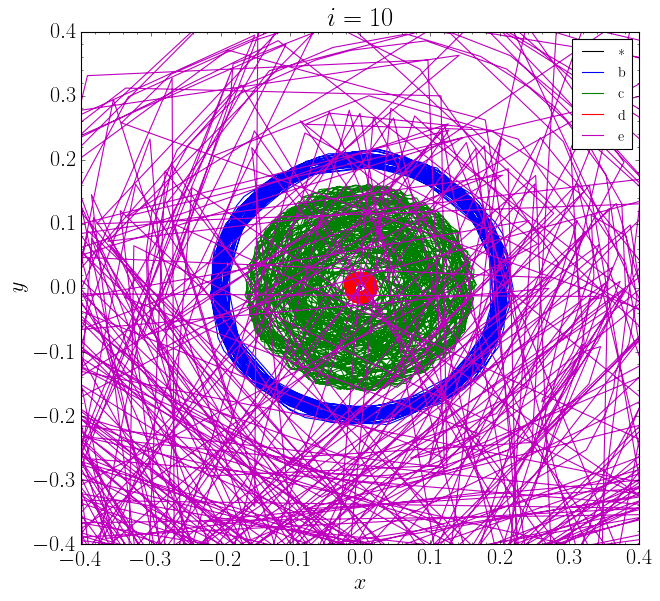

In [270]:
plt.figure(figsize=[9,8])
for k in np.arange(0,N+1):
    plt.plot(x_sim.T[k], y_sim.T[k], label=f'{names[k]}', color=colors[k])
plt.legend(loc=1, fontsize=13)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim([-.4,.4])
plt.ylim([-.4,.4])
plt.title(r'$i=%s$'%(inc_d))
plt.minorticks_on()
plt.show()

# ===========================

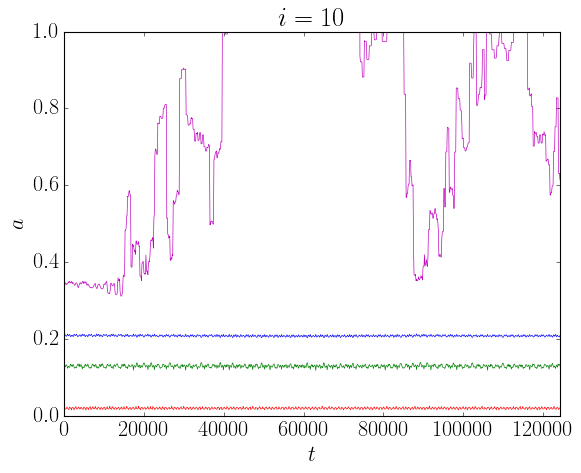

In [271]:
for k in range(1,5):
    plt.plot(times, a_sim.T[k], linewidth=.6, color=colors[k])
plt.xlim(0, max(times))
plt.ylim(0,1)
plt.ylabel(r'$a$')
plt.xlabel(r'$t$')
plt.title(r'$i=%s$'%(inc_d))
plt.show()

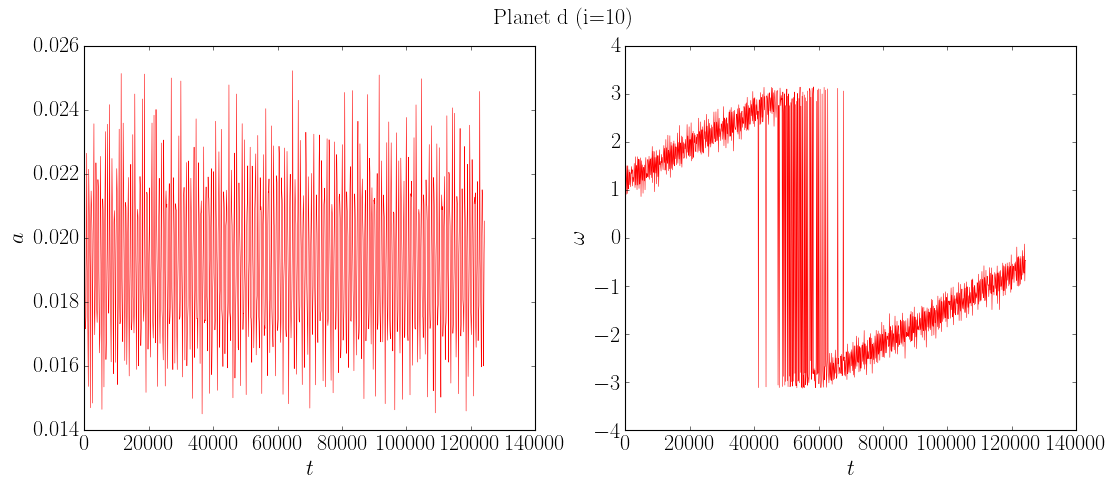

In [272]:
k = 3
fig, ax = plt.subplots(1 ,2, figsize=[16,6])
ax[0].plot(times, a_sim.T[k], linewidth=.5, color=colors[k])
ax[0].set_ylabel(r'$a$')
ax[0].set_xlabel(r'$t$')
ax[1].plot(times, w_sim.T[k], linewidth=.5, color=colors[k])
ax[1].set_ylabel(r'$\omega$')
ax[1].set_xlabel(r'$t$')
plt.suptitle(f'Planet {names[k]} (i={inc_d})')
plt.show()